<a href="https://colab.research.google.com/github/maingga/PCVK_RPL_2024/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

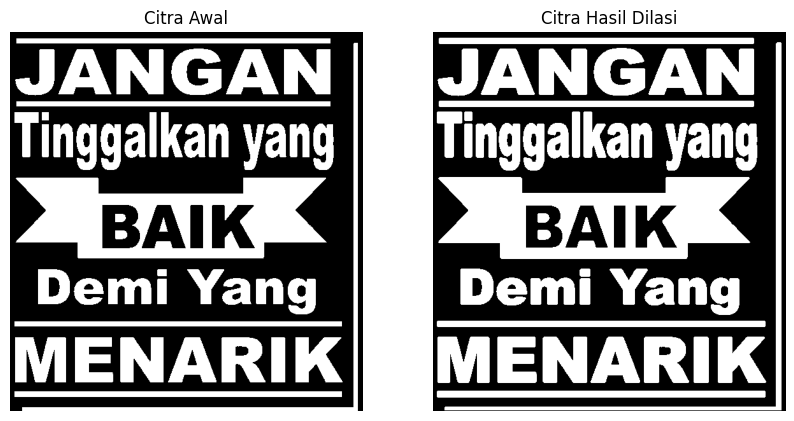

In [2]:
def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            sub_img = image[i-1:i+2, j-1:j+2]
            if np.any(sub_img[struct_elem == 1]):
                dilated_image[i, j] = 255
    return dilated_image
image = cv2.imread('txt.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
struct_elem = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)
dilated_image = dilasi_manual(binary_image, struct_elem)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


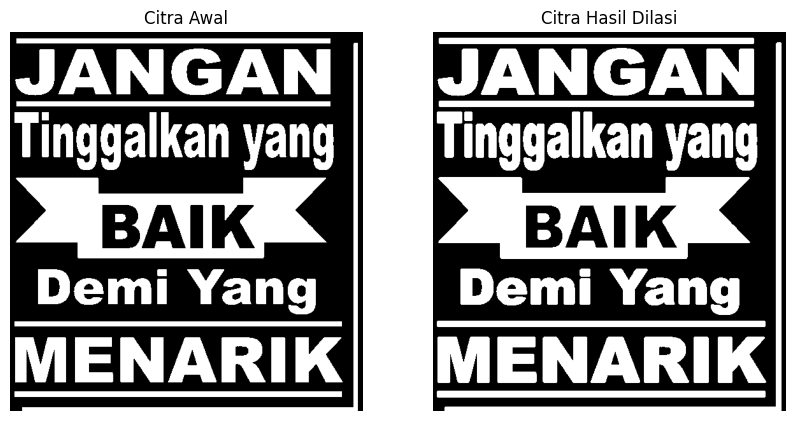

In [4]:
image = cv2.imread('txt.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    print("Structuring Element (Cross 3x3):")
    print(struct_elem)
    dilated_image = cv2.dilate(binary_image, struct_elem)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi')
    plt.axis('off')
    plt.show()

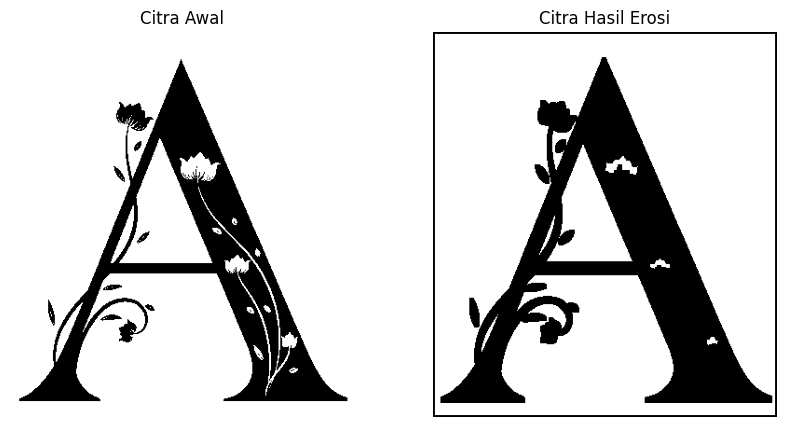

In [5]:
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255
    return eroded_image
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = np.ones((5, 5), dtype=np.uint8)
    eroded_image = erosi_manual(binary_image, struct_elem)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')
    plt.show()

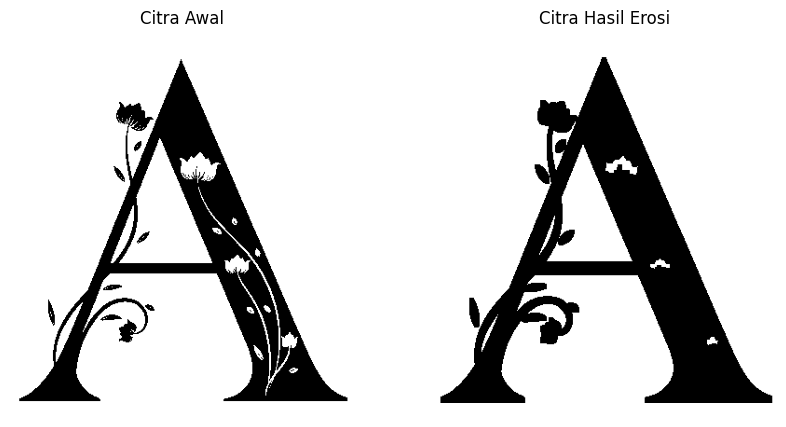

In [6]:
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    eroded_image = cv2.erode(binary_image, struct_elem)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')
    plt.show()

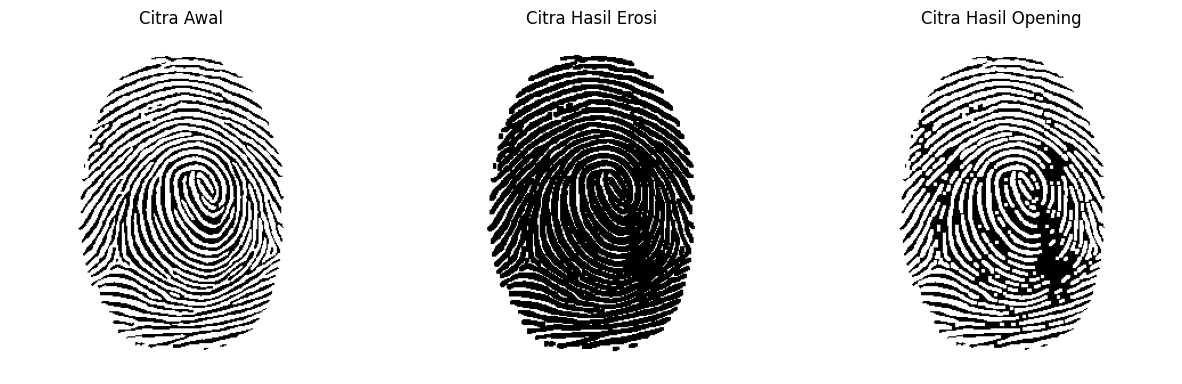

In [7]:
image = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, struct_elem)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    eroded_image = cv2.erode(binary_image, struct_elem)
    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title('Citra Hasil Opening')
    plt.axis('off')
    plt.show()

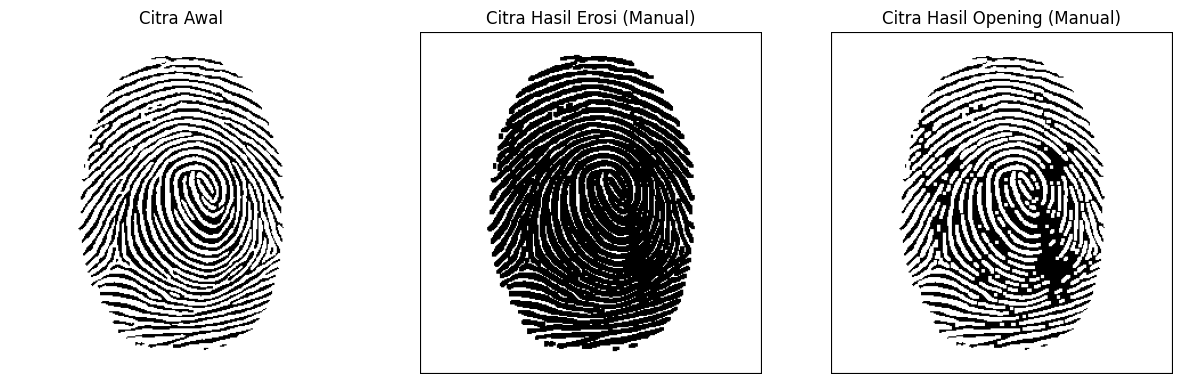

In [8]:
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255
    return eroded_image

def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.any(sub_img == 255):
                dilated_image[i, j] = 255
    return dilated_image

image = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = np.ones((3, 3), dtype=np.uint8)
    eroded_image = erosi_manual(binary_image, struct_elem)
    opened_image = dilasi_manual(eroded_image, struct_elem)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi (Manual)')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title('Citra Hasil Opening (Manual)')
    plt.axis('off')
    plt.show()

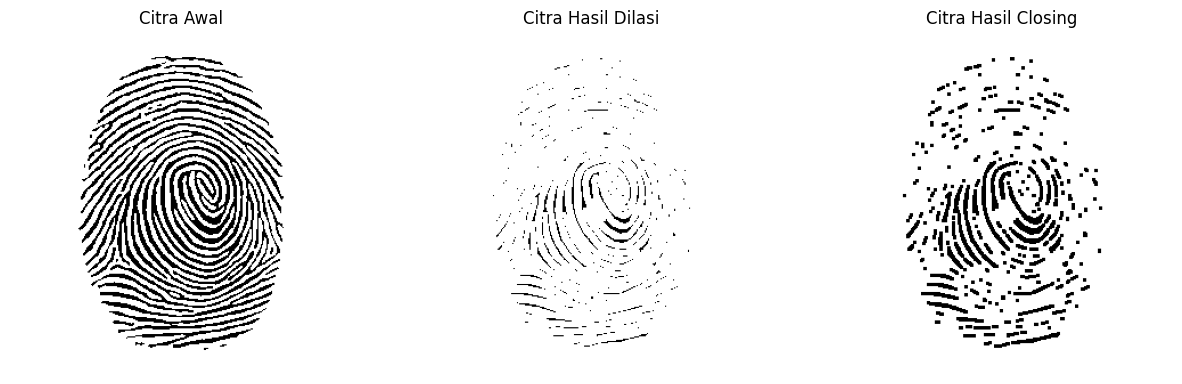

In [9]:
image = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, struct_elem)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    dilated_image = cv2.dilate(binary_image, struct_elem)
    plt.subplot(1, 3, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(closed_image, cmap='gray')
    plt.title('Citra Hasil Closing')
    plt.axis('off')
    plt.show()

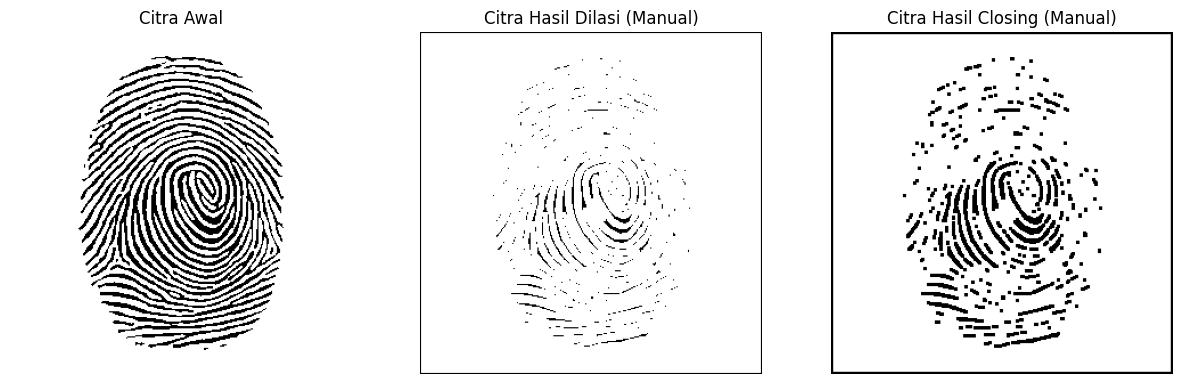

In [10]:
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255
    return eroded_image
def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.any(sub_img == 255):
                dilated_image[i, j] = 255
    return dilated_image
image = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem = np.ones((3, 3), dtype=np.uint8)
    dilated_image = dilasi_manual(binary_image, struct_elem)
    closed_image = erosi_manual(dilated_image, struct_elem)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi (Manual)')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(closed_image, cmap='gray')
    plt.title('Citra Hasil Closing (Manual)')
    plt.axis('off')
    plt.show()

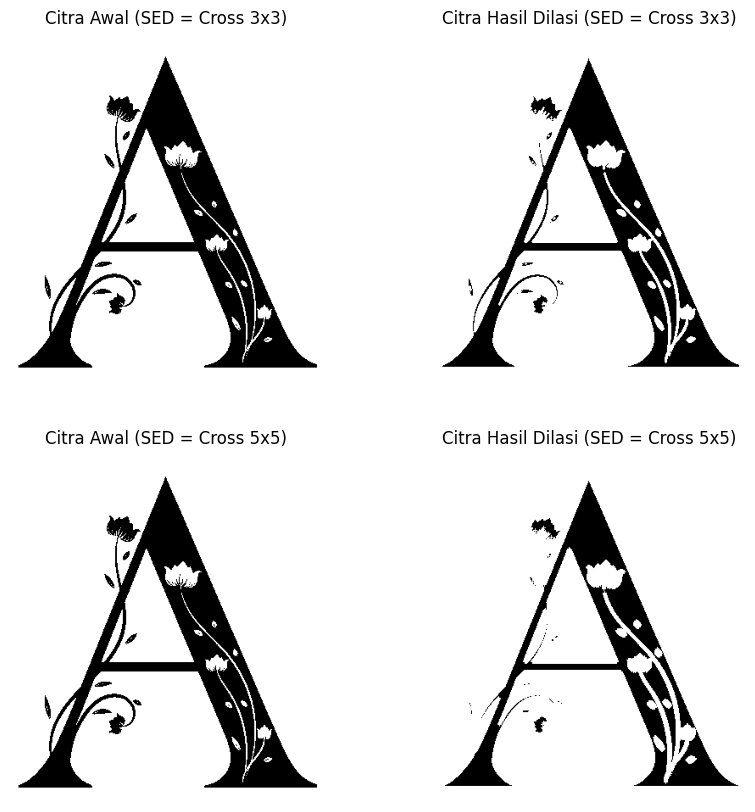

In [11]:
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    struct_elem_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
    dilated_image_3x3 = cv2.dilate(binary_image, struct_elem_3x3)
    dilated_image_5x5 = cv2.dilate(binary_image, struct_elem_5x5)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Cross 3x3)')
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.imshow(dilated_image_3x3, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Cross 3x3)')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Cross 5x5)')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.imshow(dilated_image_5x5, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Cross 5x5)')
    plt.axis('off')
    plt.show()

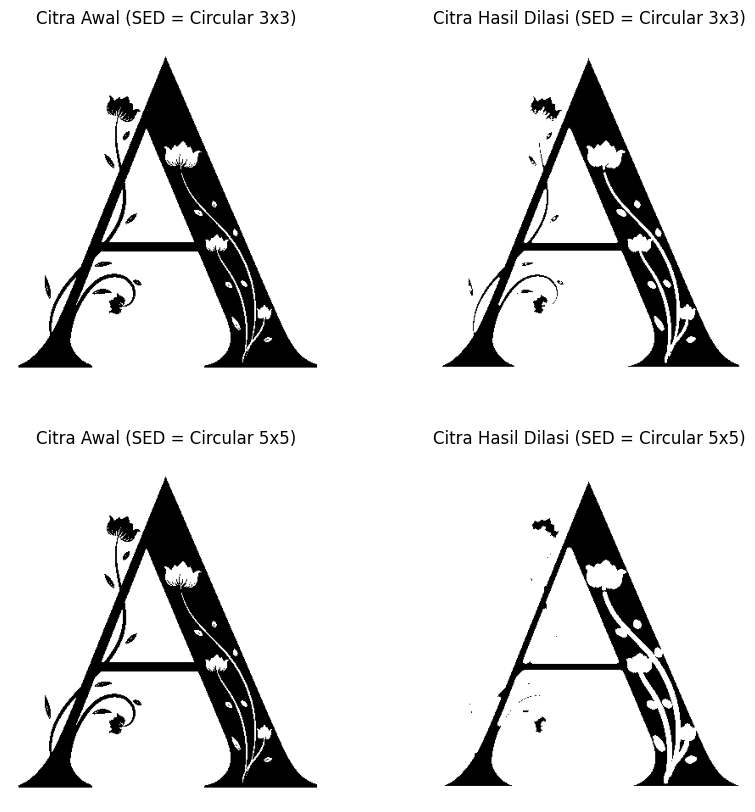

In [12]:
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem_circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    struct_elem_circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilated_image_circle_3x3 = cv2.dilate(binary_image, struct_elem_circle_3x3)
    dilated_image_circle_5x5 = cv2.dilate(binary_image, struct_elem_circle_5x5)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Circular 3x3)')
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.imshow(dilated_image_circle_3x3, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Circular 3x3)')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Circular 5x5)')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.imshow(dilated_image_circle_5x5, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Circular 5x5)')
    plt.axis('off')
    plt.show()


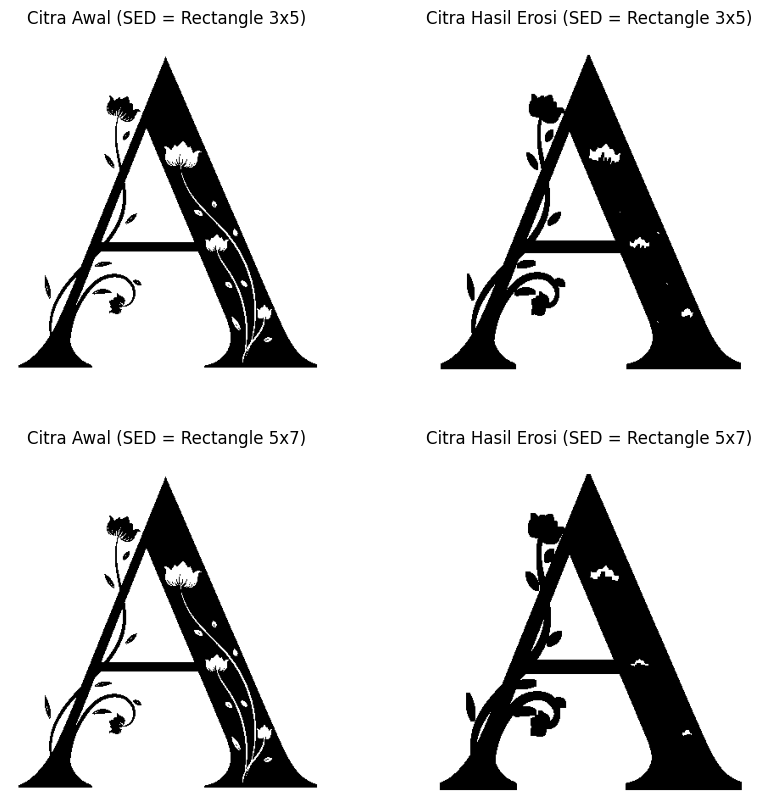

In [13]:
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
    struct_elem_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))
    eroded_image_rect_3x5 = cv2.erode(binary_image, struct_elem_rect_3x5)
    eroded_image_rect_5x7 = cv2.erode(binary_image, struct_elem_rect_5x7)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Rectangle 3x5)')
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.imshow(eroded_image_rect_3x5, cmap='gray')
    plt.title('Citra Hasil Erosi (SED = Rectangle 3x5)')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Rectangle 5x7)')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.imshow(eroded_image_rect_5x7, cmap='gray')
    plt.title('Citra Hasil Erosi (SED = Rectangle 5x7)')
    plt.axis('off')
    plt.show()

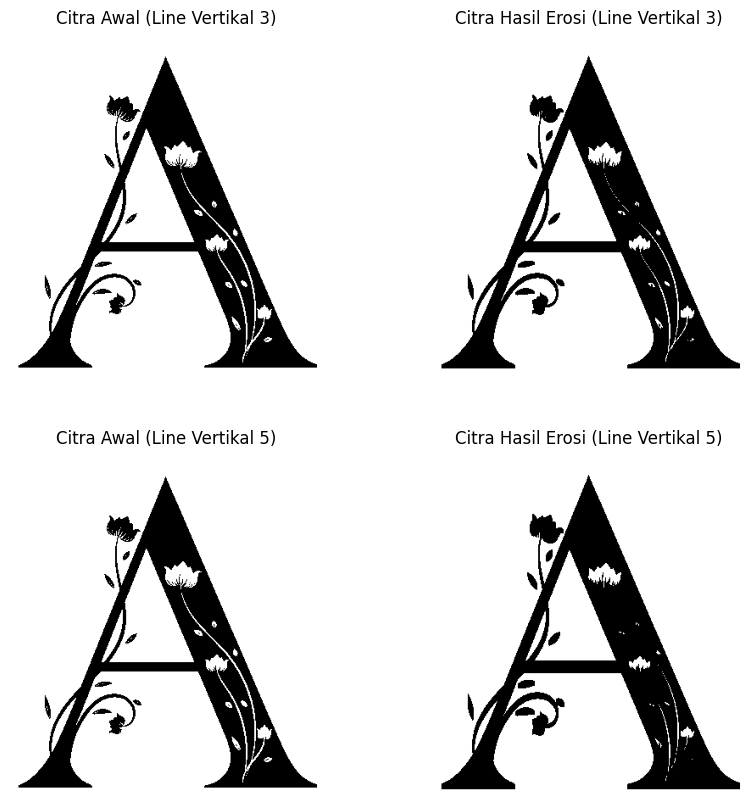

In [14]:
image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    struct_elem_line_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    struct_elem_line_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
    eroded_image_line_3 = cv2.erode(binary_image, struct_elem_line_3)
    eroded_image_line_5 = cv2.erode(binary_image, struct_elem_line_5)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (Line Vertikal 3)')
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.imshow(eroded_image_line_3, cmap='gray')
    plt.title('Citra Hasil Erosi (Line Vertikal 3)')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (Line Vertikal 5)')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.imshow(eroded_image_line_5, cmap='gray')
    plt.title('Citra Hasil Erosi (Line Vertikal 5)')
    plt.axis('off')
    plt.show()